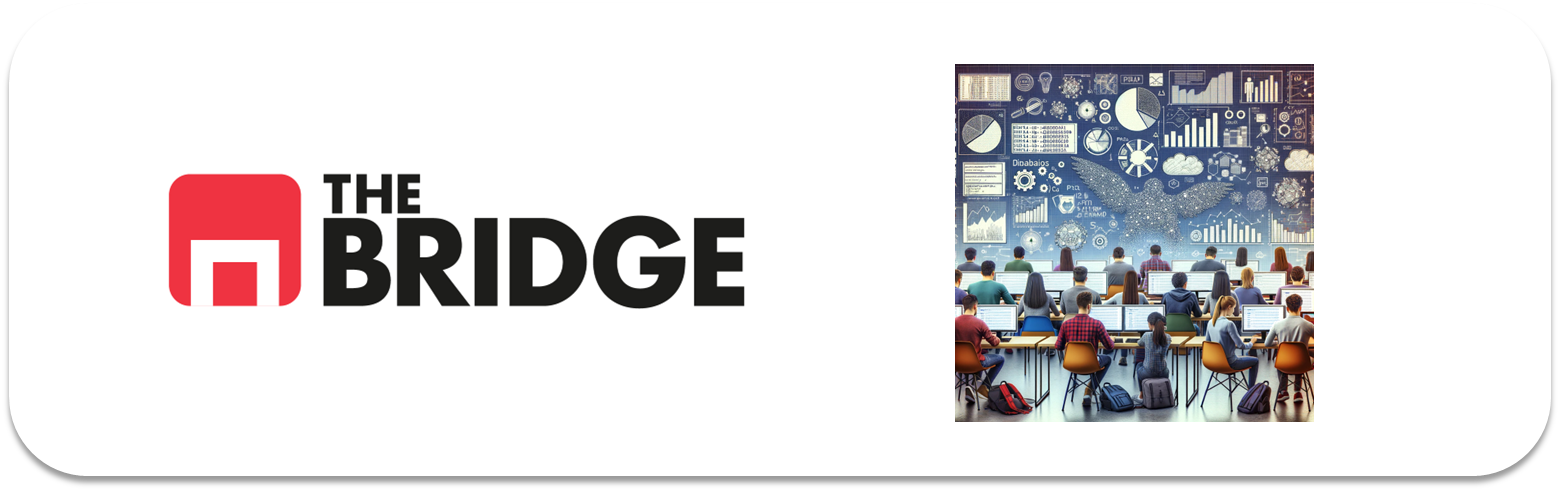

## TEAM CHALLENGE: TOOLBOX (I)

Este notebook describe la primera parte del team challenge dedicado a construir un módulo de herramientas básicas para poder preparar la creación de modelos de Machine Learning de una forma más sencilla. 

En esta primera parte, el grupo debe crear un conjunto de funciones que se describen a continuación y crear con ellas un módulo en script "toolbox_ML.py".

Este módulo se empleará en la segunda parte del challenge para resolver un problema de Machine Learning.

### Entregables
Por lo tanto, **se pide:**  
**1. Entregar un script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado [fuciones]. La entrega se hará en el repositorio del grupo.**  
**2. Hacer una descripción del código creado en una breve presentación de 20 minutos, empleando para ello un ejemplo diseñado por el grupo**  
**3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo**  

### Plazos
Tendremos 2 sesiones de team challenge para crear el código y una sesión de presentación a partir de la presentación de esta parte.



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("obligatoria_hard.csv", delimiter = "|")
dfw = pd.read_csv('WineQT.csv')

In [101]:
dfw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,NaN,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [102]:
# Eliminar la primera fila del DataFrame dfw
dfw = dfw.drop(dfw.index[0])

In [103]:
# Verificar si hay valores nulos en el DataFrame
valores_nulos = dfw.isnull().sum()

# Mostrar los resultados
print("Valores nulos en el DataFrame:")
print(valores_nulos)


Valores nulos en el DataFrame:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [104]:
dfw['quality_cat'] = pd.cut(dfw['quality'],
                                        bins=[2, 5, 6, 9],
                                        labels=['Bajo', 'Medio', 'Alto'],
                                        right=False)

# Verificar las nuevas categorías
print(dfw[['quality', 'quality_cat']])

      quality quality_cat
1           5       Medio
2           5       Medio
3           6        Alto
4           5       Medio
5           5       Medio
...       ...         ...
1138        6        Alto
1139        6        Alto
1140        5       Medio
1141        6        Alto
1142        5       Medio

[1142 rows x 2 columns]


### Funcion: describe_df

Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (no el de la imagen). Es decir un dataframe que tenga una columna por cada columan del dataframe original y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad. 

La figura muestra el resultado esperado de llamar a la función pedida con el dataset del titanic:
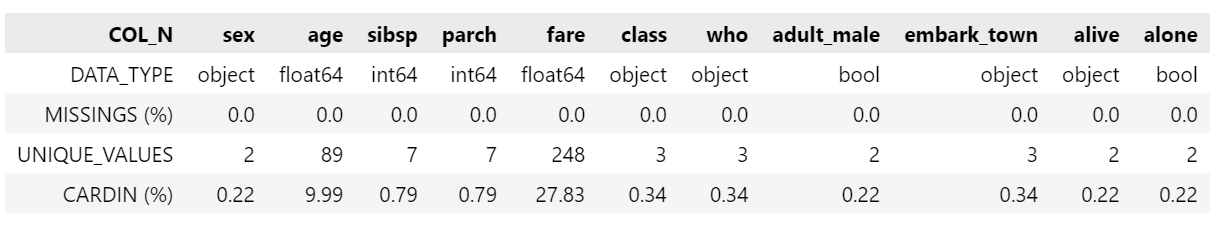
    

In [105]:

from scipy.stats import chi2_contingency, pearsonr

def describe_df(df):
    """
    Genera un resumen descriptivo del DataFrame.

    Argumentos:
    df (pandas.DataFrame): El DataFrame del que se va a generar el resumen.

    Retorna:
    pandas.DataFrame: Un DataFrame que contiene el resumen descriptivo del DataFrame de entrada.
    """
    desc = df.describe(include='all').transpose()
    desc['Missing %'] = 100 - (desc['count'] / len(df) * 100)
    desc['Cardinality %'] = (df.nunique() / len(df) * 100)
    # Agregar información sobre el tipo de datos
    desc['Data Type'] = df.dtypes
    desc['Unique Values'] = df.apply(lambda x: x.nunique())
    desc = desc[['Data Type', 'Missing %', 'Unique Values', 'Cardinality %']]
    # Transponer el DataFrame
    desc = desc.transpose()
    return desc

In [106]:
describe_df(dfw)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_cat
Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,category
Missing %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique Values,91,135,77,80,131,53,138,388,87,89,61,6,1142,3
Cardinality %,7.968476,11.821366,6.742557,7.005254,11.471103,4.640981,12.084063,33.975482,7.618214,7.793345,5.341506,0.525394,100.0,0.262697


### Funcion: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


In [107]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
    """
    Sugiere el tipo de variable para cada columna del DataFrame.

    Argumentos:
    df (pandas.DataFrame): El DataFrame que se va a tipificar.
    umbral_categoria (int): Umbral para considerar una columna como categórica.
    umbral_continua (float): Umbral de cardinalidad para considerar una columna numérica como continua.

    Retorna:
    pandas.DataFrame: Un DataFrame que contiene el nombre de la columna y el tipo sugerido para cada una.
    """
    variable_types = df.nunique().apply(lambda x: 'Binaria' if x == 2 
                                        else ('Categórica'  if x < umbral_categoria 
                                        else ('Numérica Continua' if (x / len(df) * 100) >= umbral_continua else 'Numérica Discreta')))
    result_df = pd.DataFrame({'nombre_variable': df.columns, 'tipo_sugerido': variable_types})
    # Eliminar el índice del DataFrame resultante
    result_df = result_df.reset_index(drop=True)
    return result_df

In [108]:
tipifica_variables(dfw,10, 25)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numérica Discreta
1,volatile acidity,Numérica Discreta
2,citric acid,Numérica Discreta
3,residual sugar,Numérica Discreta
4,chlorides,Numérica Discreta
5,free sulfur dioxide,Numérica Discreta
6,total sulfur dioxide,Numérica Discreta
7,density,Numérica Continua
8,pH,Numérica Discreta
9,sulphates,Numérica Discreta


### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [109]:
def get_features_num_regression(df, target_col, umbral_corr, pvalue=None):
    """
    Esta función devuelve las columnas numéricas del dataframe que tienen una correlación significativa con la columna de target.

    Argumentos:
    df (DataFrame): El dataframe a analizar.
    target_col (str): Nombre de la columna que será el target.
    umbral_corr (float): Umbral de correlación para considerar una variable como relevante.
    pvalue (float, opcional): Valor p para el test de hipótesis. Por defecto es None.

    Retorna:
    list: Una lista con los nombres de las columnas numéricas que cumplen con los criterios de correlación y p-value.
    """
    if not 0 <= umbral_corr <= 1:
        print("Error: El umbral de correlación debe estar entre 0 y 1.")
        return None
    if pvalue is not None and not 0 < pvalue < 1:
        print("Error: pvalue debe estar entre 0 y 1, exclusivo.")
        return None
    features = []
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != target_col:
            corr, pval = stats.pearsonr(df[col].dropna(), df[target_col].dropna())
            if abs(corr) >= umbral_corr and (pvalue is None or pval <= pvalue):
                features.append(col)
    return features

In [110]:
features_relevantes = get_features_num_regression(dfw, 'quality', 0.04, pvalue = 0.05)
print("Características numéricas relevantes para regresión:")
features_relevantes

Características numéricas relevantes para regresión:

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol',
 'Id']

### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Visualiza gráficos de dispersión para características numéricas en relación con una columna objetivo de un modelo de regresión.

    Argumentos:
    df (pandas.DataFrame): El DataFrame del que se obtienen las características.
    target_col (str, opcional): El nombre de la columna que debe ser el objetivo del modelo de regresión. Por defecto es "".
    columns (list, opcional): Lista de columnas a considerar en los gráficos de dispersión. Por defecto es la lista vacía.
    umbral_corr (float, opcional): Umbral de correlación para considerar una característica como significativa. Por defecto es 0.
    pvalue (float, opcional): Valor de p para realizar el test de hipótesis. Por defecto es None.

    Retorna:
    list or None: Una lista con las características que cumplen con los criterios especificados, o None si hay errores.
    """
    selected_features = get_features_num_regression(df, target_col, umbral_corr, pvalue)
    if selected_features is None or not selected_features:
        return None
    sns.pairplot(df, vars=[target_col] + selected_features, hue = target_col)
    plt.show()
    return selected_features

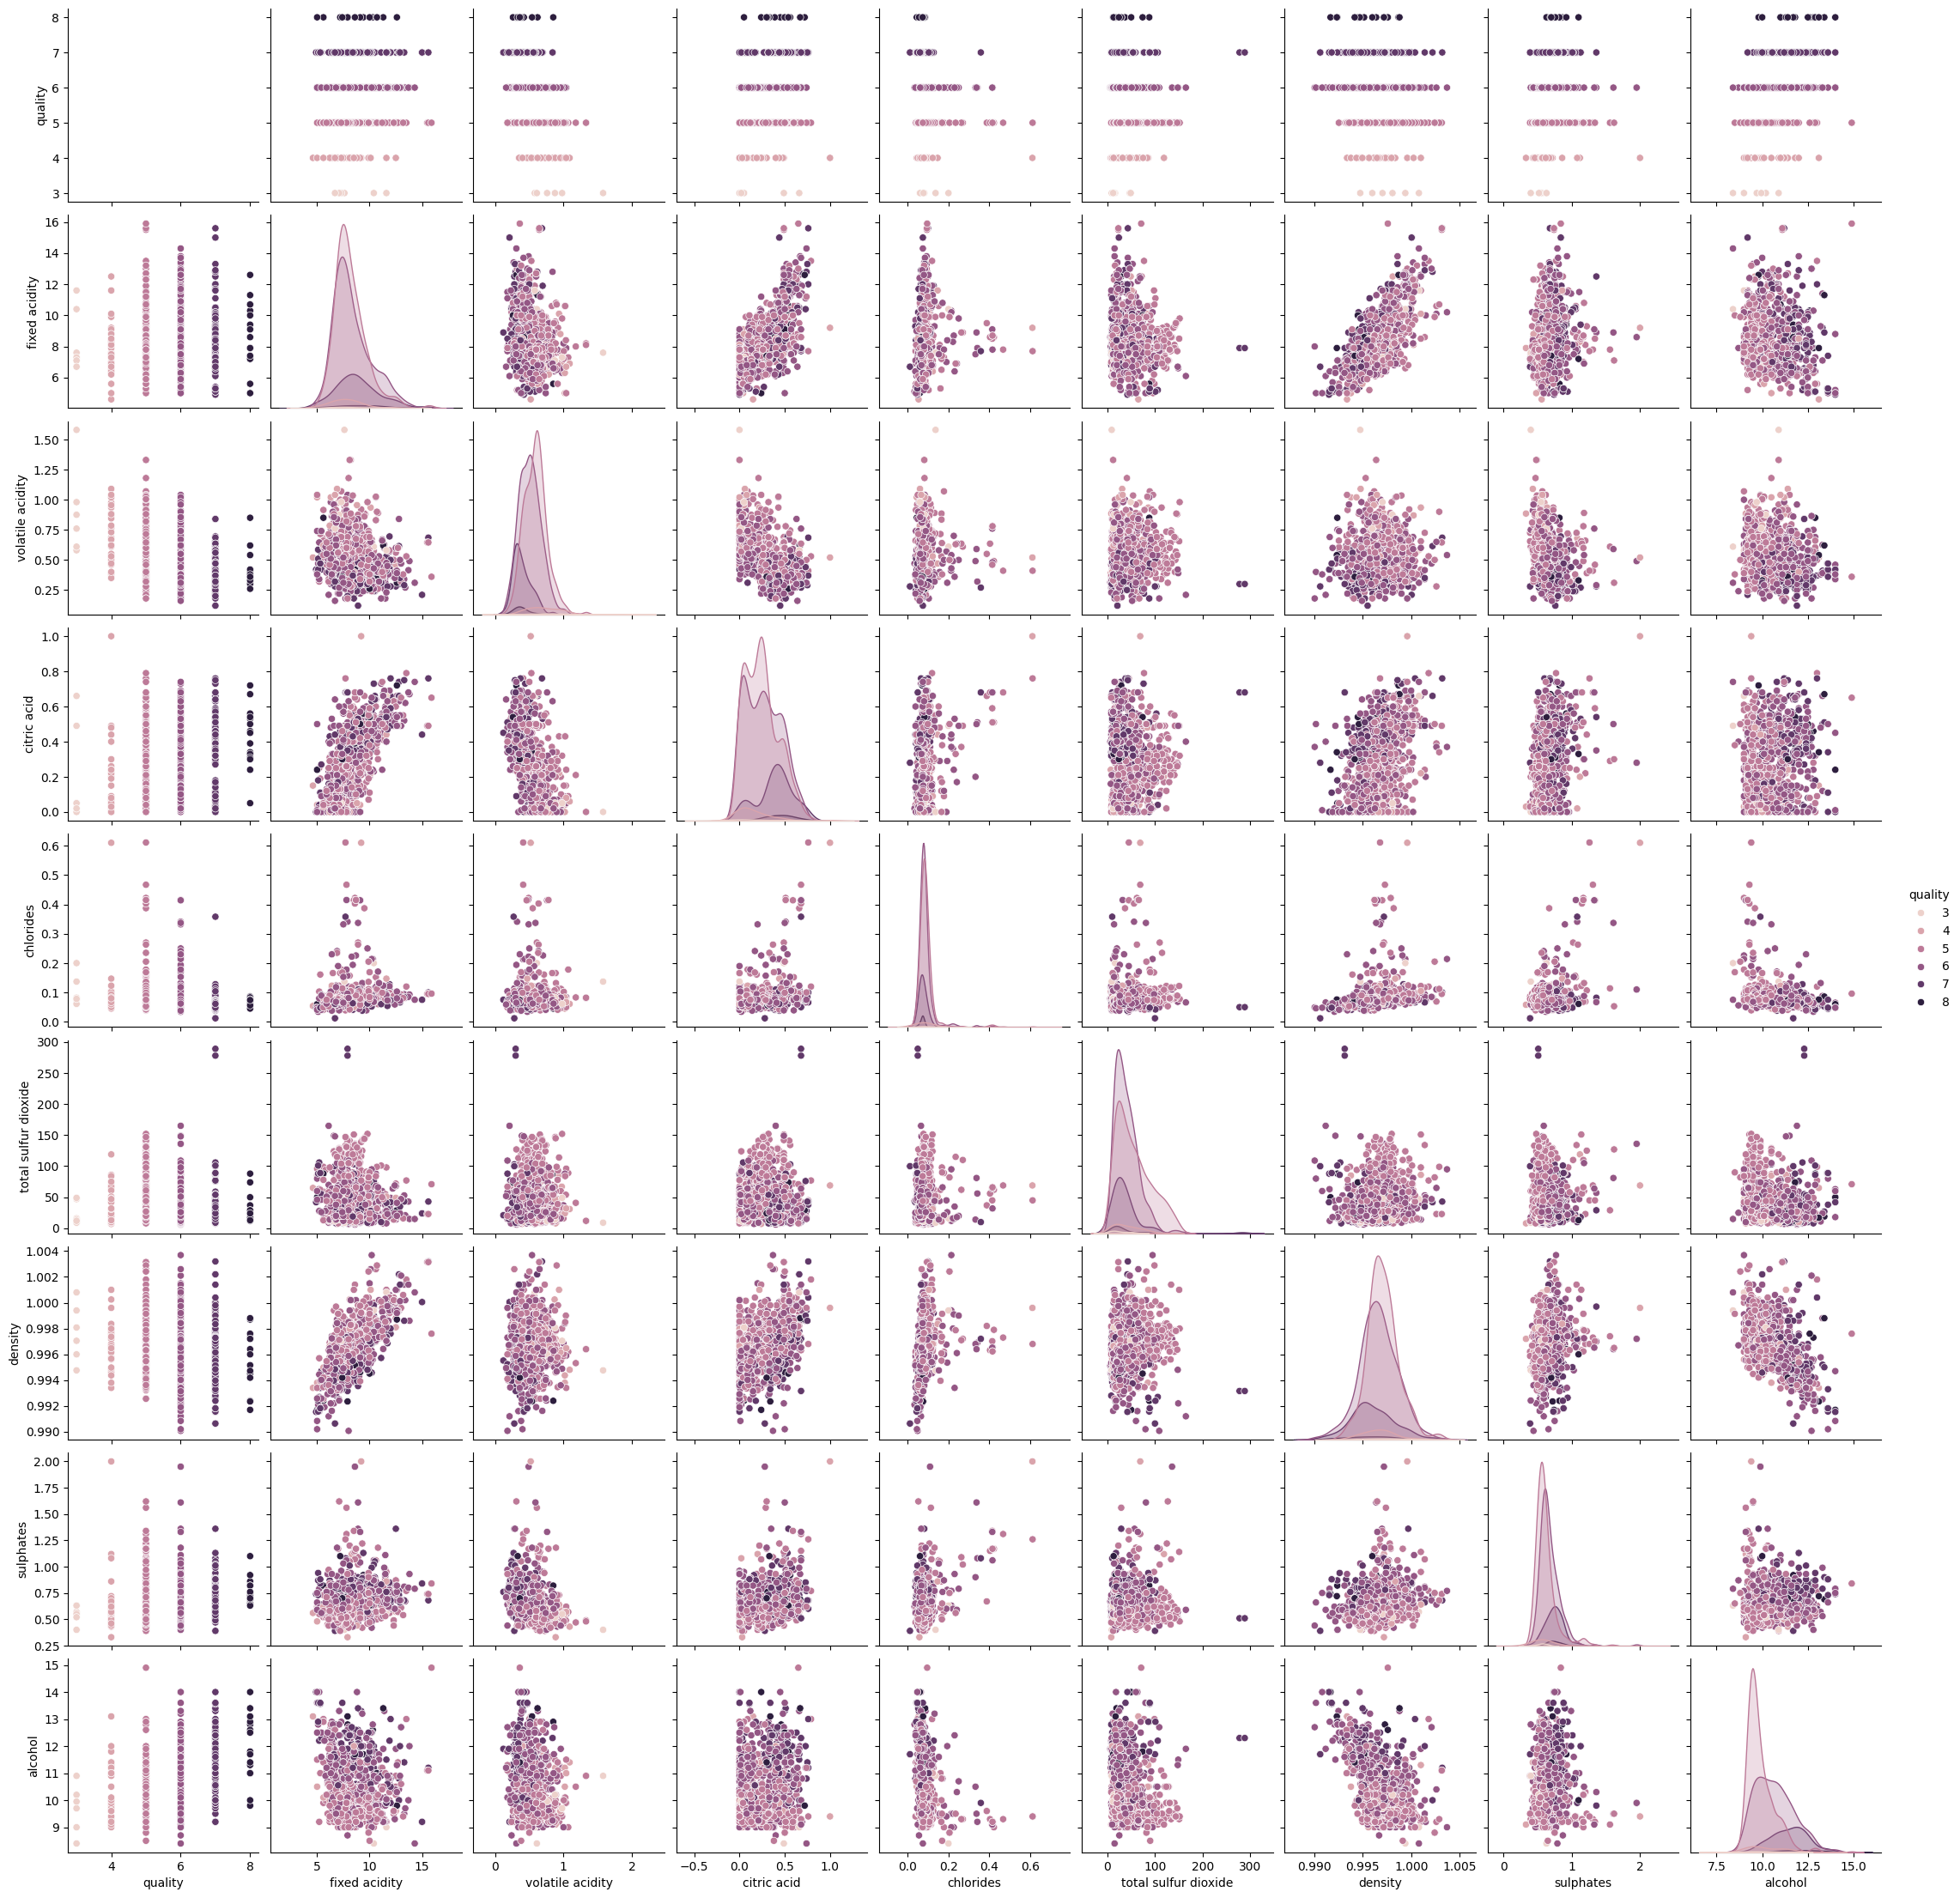

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [112]:
plot_features_num_regression(dfw, target_col="quality", columns= features_relevantes, umbral_corr=0.1)

### Funcion: get_features_cat_regression



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [113]:
def get_features_cat_regression(df, target_col, pvalue=0.05):
    """
    Obtiene las características categóricas significativas para un modelo de regresión.

    Argumentos:
    df (pandas.DataFrame): El DataFrame del que se obtienen las características.
    target_col (str): El nombre de la columna que debe ser el objetivo del modelo de regresión.
    pvalue (float, opcional): Valor de p para realizar el test de hipótesis. Por defecto es 0.05.

    Retorna:
    list or None: Una lista con las características categóricas significativas para el modelo de regresión, o None si hay errores.
    """
    if not 0 < pvalue < 1:
        print("Error: pvalue debe estar entre 0 y 1, exclusivo.")
        return None
    significant_cats = []
    for col in df.select_dtypes(include=['object', 'category']).columns:
        grouped = df.groupby(col, observed=True)[target_col].apply(list)
        f_val, p_val = stats.f_oneway(*grouped)
        if p_val <= pvalue:
            significant_cats.append(col)
    return significant_cats

In [114]:
get_features_cat_regression(dfw, 'quality', pvalue=0.05)

['quality_cat']

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

In [115]:
def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    """
    Visualiza histogramas agrupados para características categóricas en relación con una columna objetivo de un modelo de regresión.

    Argumentos:
    df (pandas.DataFrame): El DataFrame del que se obtienen las características.
    target_col (str, opcional): El nombre de la columna que debe ser el objetivo del modelo de regresión. Por defecto es "".
    columns (list, opcional): Lista de columnas a considerar en los histogramas agrupados. Por defecto es la lista vacía.
    pvalue (float, opcional): Valor de p para realizar el test de hipótesis. Por defecto es 0.05.
    with_individual_plot (bool, opcional): Indica si se deben mostrar los histogramas individuales de cada variable categórica. Por defecto es False.

    Retorna:
    list or None: Una lista con las características que cumplen con los criterios especificados, o None si hay errores.
    """
    significant_features = get_features_cat_regression(df, target_col, pvalue)
    if significant_features is None or not significant_features:
        return None
    for feature in significant_features:
        if with_individual_plot:
            sns.histplot(data=df, x=feature, hue=target_col, multiple='stack')
            plt.title(f'Histograma agrupado para {feature} en relación con {target_col}')
            plt.xlabel(feature)
            plt.ylabel('Frecuencia')
            plt.show()
    return significant_features

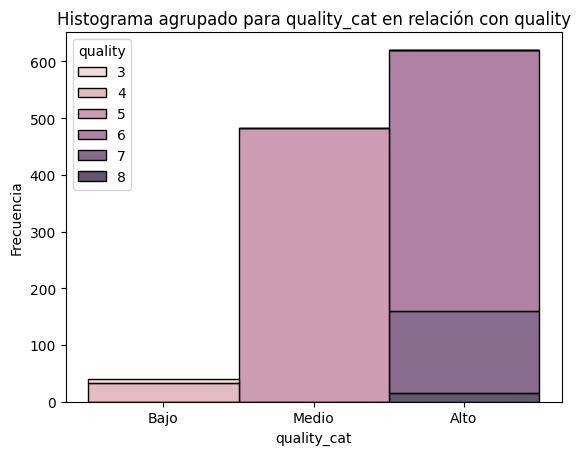

['quality_cat']

In [116]:
plot_features_cat_regression(dfw, "quality", pvalue=0.05, with_individual_plot=True)

### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

